In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Pull FRED Data
FRED_KEY = '02b2c2d2bbf883773e270d39679071c9'
FREDurl = 'https://api.stlouisfed.org/fred/series/observations'



param1 = {
    'series_id': 'CES1021100001',
    'api_key': FRED_KEY,
    'file_type': 'json'}

response = requests.get(FREDurl, params=param1)
data = response.json()
observations = data['observations']
df1 = pd.DataFrame(observations)
df1 = df1.rename(columns={"date": "ds","value": "EMP"})
df1 = df1[['ds', 'EMP']]

param2 = {
    'series_id': 'IPN213111S',
    'api_key': FRED_KEY,
    'file_type': 'json'}

response = requests.get(FREDurl, params=param2)
data = response.json()
observations = data['observations']
df2 = pd.DataFrame(observations)
df2 = df2.rename(columns={"date": "ds","value": "IND"})
df2 = df2[['ds', 'IND']]


# Pull EIA Data
EIA_KEY = 'S5kBDUycUiKkFCG6uxywpfYtq7IzU7AAhOgoUU4y'


# Initialize parameters
Date = "2010-01-01"
End = None
# API endpoints 
# EIA endpoints


 
urlPrice = 'https://api.eia.gov/v2/petroleum/pri/spt/data/'   
totalurl = 'https://api.eia.gov/v2/total-energy/data/'

# Parameters

WTI = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "RWTC",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

Brent = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "RBRTE",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

Prod = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[msn][0]": "PAPRPUS",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

Rigs = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[msn][0]": "PANRPUS",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

Wells = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[msn][0]": "PATWPUS",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

Storage = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[msn][0]": "COSXPUS",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

response2 = requests.get(urlPrice, params=WTI)
data2 = response2.json()
df6 = pd.DataFrame(data2['response']['data'])
df6 = df6[['period', 'value']]
df6.rename(columns={'value': 'WTI'}, inplace=True)
df6.rename(columns={'period': 'ds'}, inplace=True)

response2 = requests.get(urlPrice, params=Brent)
data2 = response2.json()
df8 = pd.DataFrame(data2['response']['data'])
df8 = df8[['period', 'value']]
df8.rename(columns={'value': 'Brent'}, inplace=True)
df8.rename(columns={'period': 'ds'}, inplace=True)


response2 = requests.get(totalurl, params=Prod)
data2 = response2.json()
df3 = pd.DataFrame(data2['response']['data'])
df3 = df3[['period', 'value']]
df3.rename(columns={'value': 'Prod'}, inplace=True)
df3.rename(columns={'period': 'ds'}, inplace=True)

response2 = requests.get(totalurl, params=Rigs)
data2 = response2.json()
df4 = pd.DataFrame(data2['response']['data'])
df4 = df4[['period', 'value']]
df4.rename(columns={'value': 'Rigs'}, inplace=True)
df4.rename(columns={'period': 'ds'}, inplace=True)

response2 = requests.get(totalurl, params=Wells)
data2 = response2.json()
df5 = pd.DataFrame(data2['response']['data'])
df5 = df5[['period', 'value']]
df5.rename(columns={'value': 'Wells'}, inplace=True)
df5.rename(columns={'period': 'ds'}, inplace=True)

response2 = requests.get(totalurl, params=Storage)
data2 = response2.json()
df7 = pd.DataFrame(data2['response']['data'])
df7 = df7[['period', 'value']]
df7.rename(columns={'value': 'Store'}, inplace=True)
df7.rename(columns={'period': 'ds'}, inplace=True)


for df in [df1, df2, df3, df4, df5, df6, df7, df8]:
    df['ds'] = pd.to_datetime(df['ds']).dt.to_period('M').dt.to_timestamp()
df_merged = df1
df_merged = pd.merge(df_merged, df2, on='ds', how='outer')
df_merged = pd.merge(df_merged, df3, on='ds', how='outer')
df_merged = pd.merge(df_merged, df4, on='ds', how='outer')
df_merged = pd.merge(df_merged, df5, on='ds', how='outer')
df_merged = pd.merge(df_merged, df7, on='ds', how='outer')
df_merged = pd.merge(df_merged, df6, on='ds', how='outer')
df_merged = pd.merge(df_merged, df8, on='ds', how='outer')




print(df_merged.tail(20))

df_merged.to_pickle("Production.pkl")


            ds    EMP       IND       Prod Rigs Wells    Store    WTI  Brent
622 2023-11-01  119.8  110.4381  13281.094  498   817  441.838  77.69  82.94
623 2023-12-01  121.1  109.2864  13307.958  501   858  426.491   71.9  77.63
624 2024-01-01  122.1  108.5309  12553.566  499   784  427.857  74.15  80.12
625 2024-02-01  121.9  108.0537   13102.08  500   838  447.929  77.25  83.48
626 2024-03-01  122.1  109.0561  13170.783  507   828  447.206  81.28  85.41
627 2024-04-01  121.8  105.2515  13248.629  508   937  463.842  85.35  89.94
628 2024-05-01  122.7  103.1317  13201.128  497   807  454.548  80.02  81.75
629 2024-06-01  123.2  103.7599  13239.855  486   818  440.151  79.77  82.25
630 2024-07-01  123.0  103.4599  13191.927  479   955  427.207   81.8  85.15
631 2024-08-01  121.9  103.7464  13363.545  483   878   417.35  76.68  80.36
632 2024-09-01  122.5  105.0522  13184.702  486   787  415.933  70.24  74.02
633 2024-10-01  122.5  103.3379  13450.094  481   931  423.629  71.99  75.63

In [3]:
# Approximate current month pricing data
df = pd.read_pickle("Production.pkl")
df['ds'] = pd.to_datetime(df['ds'])

# === Step 1: Get current month start ===
last_reported_month = df['ds'].max()
next_month_start = last_reported_month + relativedelta(months=1)


# === Step 2: Check if row exists for current month ===
if next_month_start not in df['ds'].values:
    
    # === Step 3: Get 30-day average prices from yfinance ===
    today = datetime.today()
    start_date = today - timedelta(days=30)

    wti = yf.download("CL=F", start=start_date, end=today)['Close'].dropna()
    wti_avg = wti.mean().item()

    brent = yf.download('BZ=F', start=start_date, end=today)['Close'].dropna()
    brent_avg = brent.mean().item()

    # === Step 4: Create new row ===
    new_row = {
        'ds': next_month_start,
        'WTI': wti_avg,
        'Brent': brent_avg,
        # Fill other columns with NaN
        'EMP': None,
        'IND': None,
        'Prod': None,
        'Store': None,
        'Rigs': None,
        'Wells': None,
    }

    # === Step 5: Append to DataFrame ===
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
 


df.to_pickle("Production1.pkl")

print(df.tail(20))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

            ds    EMP       IND       Prod  Rigs Wells    Store        WTI  \
623 2023-12-01  121.1  109.2864  13307.958   501   858  426.491       71.9   
624 2024-01-01  122.1  108.5309  12553.566   499   784  427.857      74.15   
625 2024-02-01  121.9  108.0537   13102.08   500   838  447.929      77.25   
626 2024-03-01  122.1  109.0561  13170.783   507   828  447.206      81.28   
627 2024-04-01  121.8  105.2515  13248.629   508   937  463.842      85.35   
628 2024-05-01  122.7  103.1317  13201.128   497   807  454.548      80.02   
629 2024-06-01  123.2  103.7599  13239.855   486   818  440.151      79.77   
630 2024-07-01  123.0  103.4599  13191.927   479   955  427.207       81.8   
631 2024-08-01  121.9  103.7464  13363.545   483   878   417.35      76.68   
632 2024-09-01  122.5  105.0522  13184.702   486   787  415.933      70.24   
633 2024-10-01  122.5  103.3379  13450.094   481   931  423.629      71.99   
634 2024-11-01  122.9   99.8826  13352.046   478   759  421.308 

In [4]:
# Adjust for EIA reporting error
EIA_KEY = 'S5kBDUycUiKkFCG6uxywpfYtq7IzU7AAhOgoUU4y'


# Initialize parameters
Date = "2010-01-01"
End = None
# API endpoints 
# EIA endpoints

sndurl = 'https://api.eia.gov/v2/petroleum/sum/snd/data/'

adjust = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "MCRUA_NUS_2",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}
response2 = requests.get(sndurl, params=adjust)
data2 = response2.json()
df3 = pd.DataFrame(data2['response']['data'])
df3 = df3[['period', 'value']]
df3.rename(columns={'value': 'Adjust'}, inplace=True)
df3.rename(columns={'period': 'ds'}, inplace=True)

df = pd.read_pickle("Production1.pkl")

# Ensure 'ds' is datetime in both DataFrames
df['ds'] = pd.to_datetime(df['ds'])
df3['ds'] = pd.to_datetime(df3['ds'])

# Merge adjustment values into df
df = pd.merge(df, df3[['ds', 'Adjust']], on='ds', how='left')

# Add adjustment to Demand (make sure both columns are numeric)
df['Prod'] = pd.to_numeric(df['Prod'], errors='coerce') + pd.to_numeric(df['Adjust'], errors='coerce')

# Drop the Adjust column if no longer needed
df.drop(columns=['Adjust'], inplace=True)

 
url = 'https://api.eia.gov/v2/petroleum/sum/snd/data/'

# Parameters

Transfer = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "M_EPC0_TVP_NUS_MBBLD",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}


response2 = requests.get(url, params=Transfer)
data2 = response2.json()
df6 = pd.DataFrame(data2['response']['data'])
df6 = df6[['period', 'value']]
df6.rename(columns={'value': 'Transfers'}, inplace=True)
df6.rename(columns={'period': 'ds'}, inplace=True)
df6['ds'] = pd.to_datetime(df6['ds'])

df['ds'] = pd.to_datetime(df['ds'])
df6['ds'] = pd.to_datetime(df6['ds'])

# Merge adjustment values into df
df = pd.merge(df, df6[['ds', 'Transfers']], on='ds', how='left')

# Add adjustment to Demand (make sure both columns are numeric)
df['Prod'] = pd.to_numeric(df['Prod'], errors='coerce') + pd.to_numeric(df['Transfers'], errors='coerce')

# Drop the Adjust column if no longer needed
df.drop(columns=['Transfers'], inplace=True)

# View result
print(df.tail(20))

df.to_pickle("Production1.pkl")

            ds    EMP       IND       Prod  Rigs Wells    Store        WTI  \
623 2023-12-01  121.1  109.2864  14295.958   501   858  426.491       71.9   
624 2024-01-01  122.1  108.5309  12976.566   499   784  427.857      74.15   
625 2024-02-01  121.9  108.0537  13799.080   500   838  447.929      77.25   
626 2024-03-01  122.1  109.0561  14052.783   507   828  447.206      81.28   
627 2024-04-01  121.8  105.2515  14057.629   508   937  463.842      85.35   
628 2024-05-01  122.7  103.1317  13584.128   497   807  454.548      80.02   
629 2024-06-01  123.2  103.7599  13997.855   486   818  440.151      79.77   
630 2024-07-01  123.0  103.4599  13296.927   479   955  427.207       81.8   
631 2024-08-01  121.9  103.7464  14238.545   483   878   417.35      76.68   
632 2024-09-01  122.5  105.0522  13527.702   486   787  415.933      70.24   
633 2024-10-01  122.5  103.3379  14022.094   481   931  423.629      71.99   
634 2024-11-01  122.9   99.8826  14385.046   478   759  421.308 

In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'EMP'
EXOG_COLS = ['WTI', 'Brent']
df = pd.read_pickle("Production1.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=100,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=1,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))

df_full = df

#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""


=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      1.68
RMSE (Root Mean Squared Error): 2.12
MAPE (Mean Absolute % Error):   1.37%

=== Final df with historical + forecasted values ===
        ds        EMP
2024-12-01 123.000000
2025-01-01 123.100000
2025-02-01 122.400000
2025-03-01 122.300000
2025-04-01 122.600000
2025-05-01 122.800000
2025-06-01 122.300000
2025-07-01 122.847488

=== Best Parameters Found ===
{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}


In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'IND'
EXOG_COLS = ['WTI', 'Brent']
df = pd.read_pickle("Production1.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=800,
    max_depth=2,
    learning_rate=0.05,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))

if TARGET_COL not in df_full.columns:
    df_full = pd.merge(df_full, df, on='ds', how='outer')
else:
    df_full.set_index('ds', inplace=True)
    df.set_index('ds', inplace=True)
    df_full.update(df[[TARGET_COL]])
    df_full.reset_index(inplace=True)

#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""


=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      1.73
RMSE (Root Mean Squared Error): 2.76
MAPE (Mean Absolute % Error):   1.74%

=== Final df with historical + forecasted values ===
        ds       IND
2024-12-01 99.610300
2025-01-01 98.571700
2025-02-01 99.144600
2025-03-01 99.993400
2025-04-01 98.247200
2025-05-01 95.689000
2025-06-01 95.978699
2025-07-01 95.821808

=== Best Parameters Found ===
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400, 'subsample': 0.8}


In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'Rigs'
EXOG_COLS = ['WTI', 'Brent']
df = pd.read_pickle("Production1.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.2,
    subsample=1,
    colsample_bytree=0.6,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))

if TARGET_COL not in df_full.columns:
    df_full = pd.merge(df_full, df, on='ds', how='outer')
else:
    df_full.set_index('ds', inplace=True)
    df.set_index('ds', inplace=True)
    df_full.update(df[[TARGET_COL]])
    df_full.reset_index(inplace=True)

#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""


=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      13.13
RMSE (Root Mean Squared Error): 14.01
MAPE (Mean Absolute % Error):   2.75%

=== Final df with historical + forecasted values ===
        ds       Rigs
2024-12-01 483.000000
2025-01-01 478.000000
2025-02-01 484.000000
2025-03-01 486.000000
2025-04-01 475.000000
2025-05-01 462.000000
2025-06-01 469.271057
2025-07-01 474.377747

=== Best Parameters Found ===
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 600, 'subsample': 1}


In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'Wells'
EXOG_COLS = ['WTI', 'Brent']
df = pd.read_pickle("Production1.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.2,
    subsample=1,
    colsample_bytree=0.6,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))

if TARGET_COL not in df_full.columns:
    df_full = pd.merge(df_full, df, on='ds', how='outer')
else:
    df_full.set_index('ds', inplace=True)
    df.set_index('ds', inplace=True)
    df_full.update(df[[TARGET_COL]])
    df_full.reset_index(inplace=True)

#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""


=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      60.38
RMSE (Root Mean Squared Error): 73.19
MAPE (Mean Absolute % Error):   7.29%

=== Final df with historical + forecasted values ===
        ds      Wells
2024-12-01 765.000000
2025-01-01 758.000000
2025-02-01 769.000000
2025-03-01 771.000000
2025-04-01 770.000000
2025-05-01 745.000000
2025-06-01 742.341309
2025-07-01 785.383484

=== Best Parameters Found ===
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.6}


In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'Store'
EXOG_COLS = ['WTI', 'Brent']
df = pd.read_pickle("Production1.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=100,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
df.to_pickle("Storage.pkl")
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))

if TARGET_COL not in df_full.columns:
    df_full = pd.merge(df_full, df, on='ds', how='outer')
else:
    df_full.set_index('ds', inplace=True)
    df.set_index('ds', inplace=True)
    df_full.update(df[[TARGET_COL]])
    df_full.reset_index(inplace=True)

#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""




=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      8.90
RMSE (Root Mean Squared Error): 9.50
MAPE (Mean Absolute % Error):   2.09%

=== Final df with historical + forecasted values ===
        ds      Store
2024-12-01 413.734000
2025-01-01 418.782000
2025-02-01 429.786000
2025-03-01 431.688000
2025-04-01 438.666000
2025-05-01 435.018000
2025-06-01 433.022461
2025-07-01 430.937286

=== Best Parameters Found ===
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}


In [10]:
df = pd.read_pickle("Production1.pkl")
df = df[['ds', 'Prod']].copy()

if 'Prod' not in df_full.columns:
    df_full = pd.merge(df_full, df, on='ds', how='outer')
else:
    df_full.set_index('ds', inplace=True)
    df.set_index('ds', inplace=True)
    df_full.update(df[['Prod']])
    df_full.reset_index(inplace=True)


df_full = df_full[['ds', 'IND', 'EMP', 'Store', 'Rigs', 'Wells', 'Prod']].copy()


# Check if last row (excluding 'ds') is all NaN
if not df_full.iloc[-1].drop(labels='ds').isna().all():
    next_date = df_full['ds'].max() + relativedelta(months=1)
    new_row = {col: pd.NA for col in df_full.columns}
    new_row['ds'] = next_date
    df_full = pd.concat([df_full, pd.DataFrame([new_row])], ignore_index=True)

print(df_full.tail())

            ds        IND         EMP       Store        Rigs       Wells  \
639 2025-04-01  98.247200  122.600000  438.666000  475.000000  770.000000   
640 2025-05-01  95.689000  122.800000  435.018000  462.000000  745.000000   
641 2025-06-01  95.978699  122.300000  433.022461  469.271057  742.341309   
642 2025-07-01  95.821808  122.847488  430.937286  474.377747  785.383484   
643 2025-08-01        NaN         NaN         NaN         NaN         NaN   

          Prod  
639  14107.833  
640        NaN  
641        NaN  
642        NaN  
643        NaN  


/var/folders/1v/qxw436v577vd4tnnpxrghrpw0000gn/T/ipykernel_63499/3736537903.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full = pd.concat([df_full, pd.DataFrame([new_row])], ignore_index=True)



=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      452.18
RMSE (Root Mean Squared Error): 547.16
MAPE (Mean Absolute % Error):   3.20%


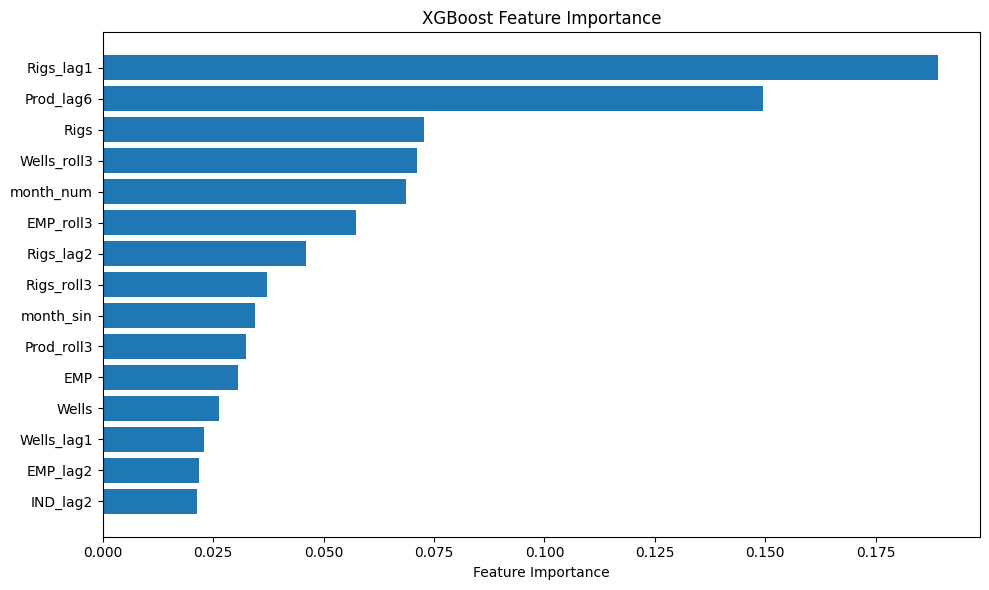


=== Final df with historical + forecasted values ===
        ds         Prod
2025-01-01 13229.518000
2025-02-01 14008.885000
2025-03-01 14261.269000
2025-04-01 14107.833000
2025-05-01 14083.351562
2025-06-01 14138.632812
2025-07-01 13685.968750
2025-08-01 13886.073242

=== Best Parameters Found ===
{'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.8}


: 

In [ ]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'Prod'
EXOG_COLS = ['IND', 'EMP', 'Store', 'Rigs', 'Wells']
df = df_full  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2020-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=300,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

#

importances = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[sorted_idx][:top_n][::-1])
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    if i == 0:
        continue  # Skip the first row since there's no prior data

    prior = df.loc[:i - 1].copy()
    if prior.empty:
        continue  # Avoid crashing if prior is unexpectedly empty

    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
df.to_pickle("ProductionS.pkl")
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))


#=============================#
#    Optimize Parameters      #
#=============================#

"""from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [1, 0.8, 0.6],
    'colsample_bytree': [1, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)"""